## AIML Classification Project Personal Loan Modeling
### author: Aidos Utegulov Feb 21 cohort

## Description
### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression


# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

### Read the data

In [2]:
ldata = pd.read_csv("Loan_Modelling.csv")

In [3]:
ldata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Dataset summary

In [4]:
ldata.shape

(5000, 14)

In [5]:
ldata.isnull().values.any() 

False

In [6]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
ldata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
ldata.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

### Observations and Insights

 - There are 5000 rows and 14 columns in the dataset
 - All of the column data types are numeric
 - The Experience column seems to have negative values

### Drop ID column

In [9]:
ldata.drop('ID', inplace = True, axis = 1)

In [10]:
ldata.shape

(5000, 13)

In [11]:
ldata.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

## EDA

I'm using the function taken from the MLS session notebook that plots histogram and boxplots of the feature:

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [13]:
ldata.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Univariate Analysis

### Observations on Age

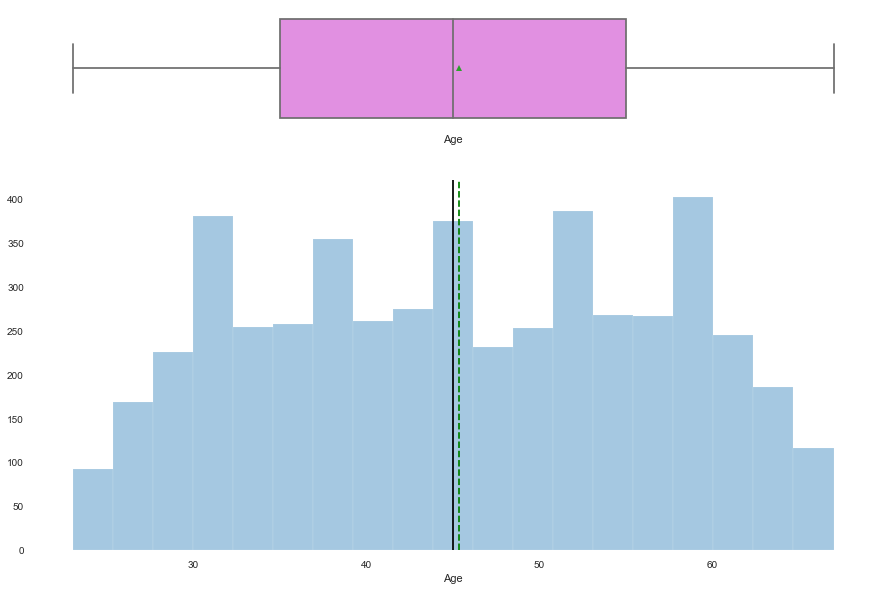

In [14]:
histogram_boxplot(ldata["Age"])

- Age appears to be uniformly distributed with the mean being aroun 45 years old
- There's no significant skewness in the data

### Observations on average spendings on credit card

In [15]:
ldata.CCAvg.unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

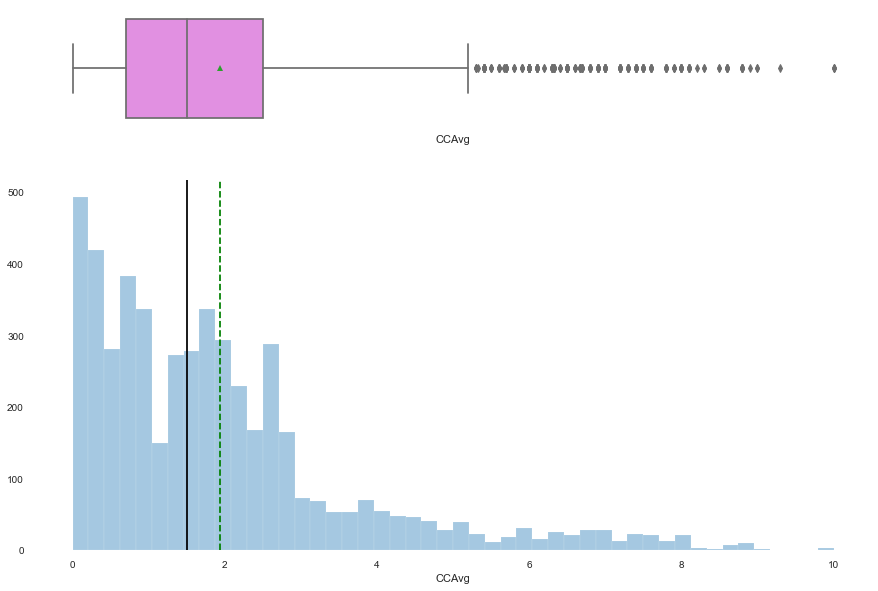

In [16]:
histogram_boxplot(ldata['CCAvg'])

- The data are right-skewed, with the mean being close to 2
- There appear to be quite a significant amount of outliers

### Observations on Income

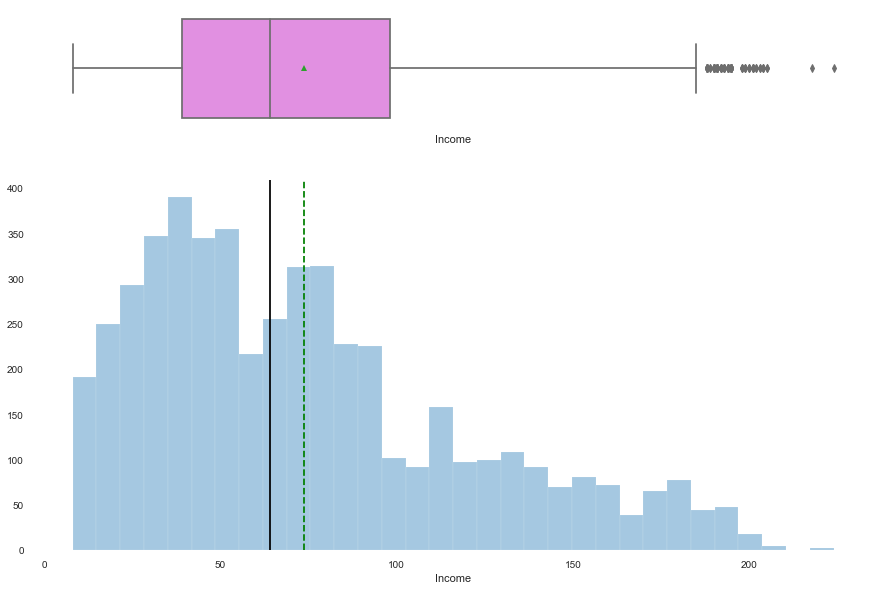

In [17]:
histogram_boxplot(ldata['Income'])

- The data are slightly right-skewed 
- There is again quite a significant number of outliers

### Observations on Education

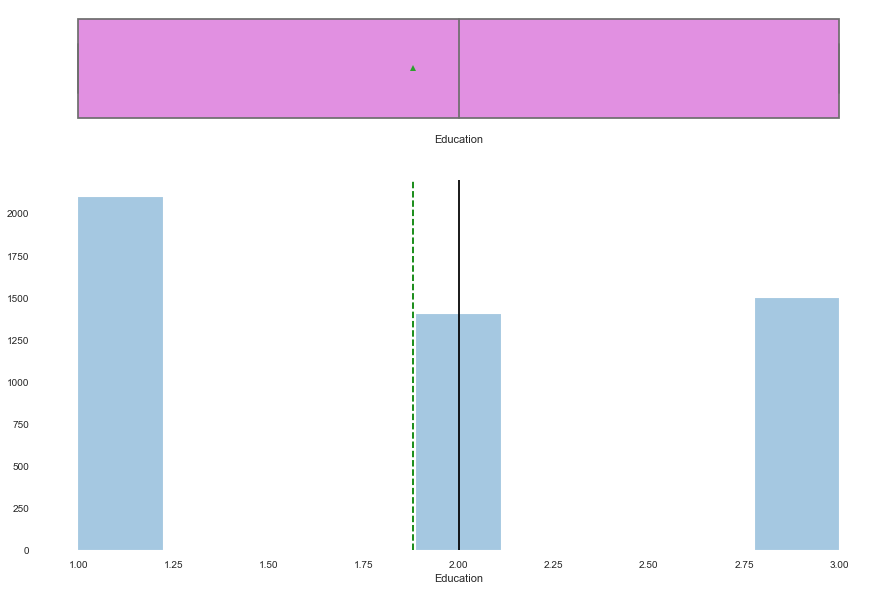

In [18]:
histogram_boxplot(ldata['Education'])

- Most of the people have an undergraduate level of education
- There are slightly more professionals than people with graduate degrees

### Observations on Experience

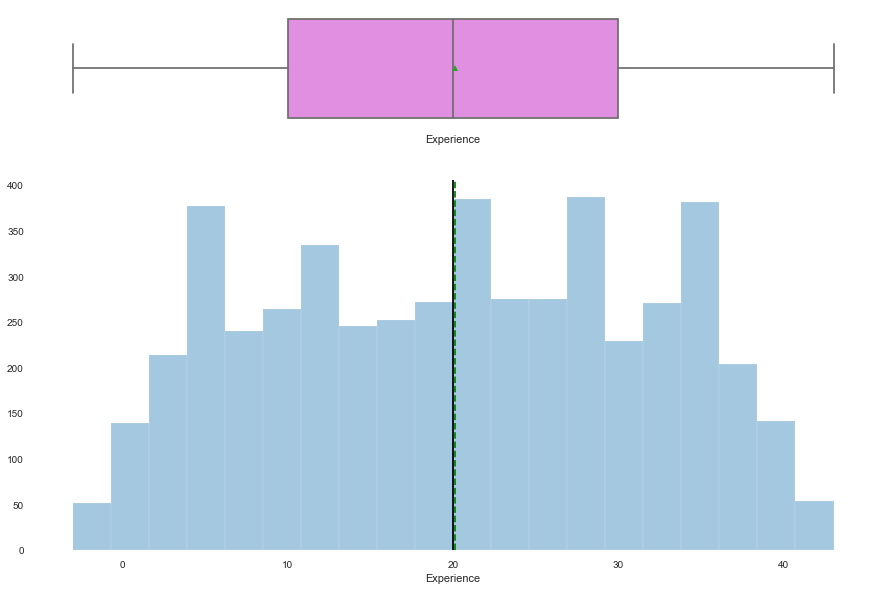

In [19]:
histogram_boxplot(ldata['Experience'])

- Data seem uniformly distributed with the mean being 20

### Observations on Family

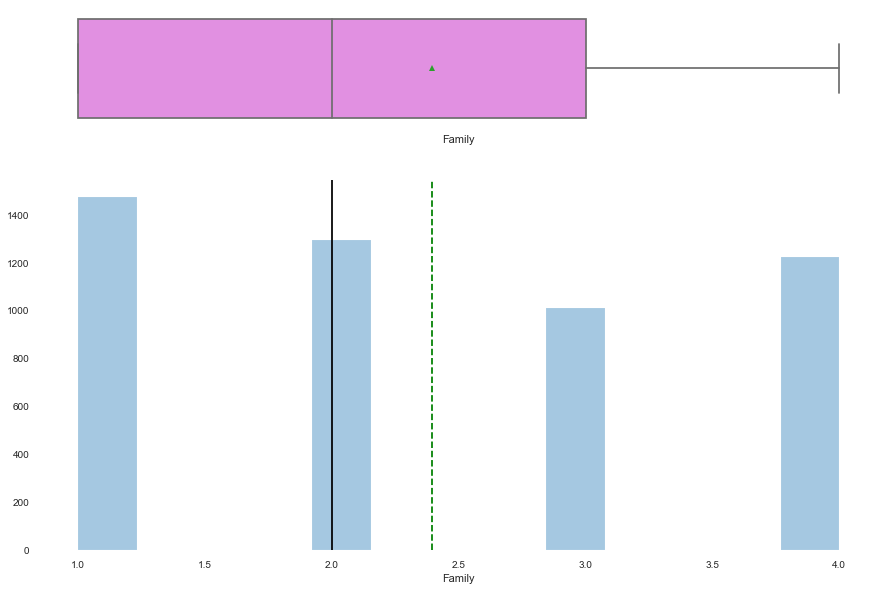

In [20]:
histogram_boxplot(ldata['Family'])

- Most people are single
- The mean number of people in the family is 2

### Observations on Mortgage

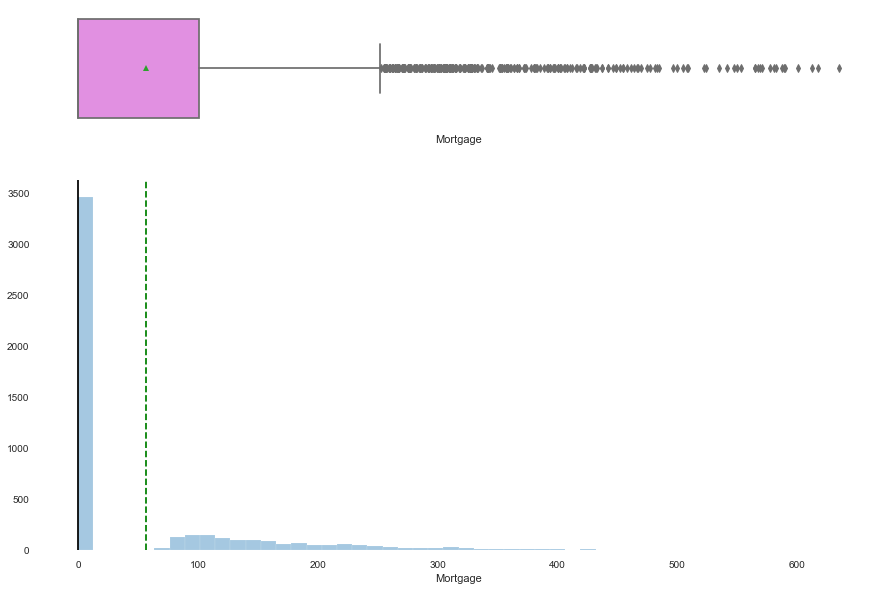

In [21]:
histogram_boxplot(ldata['Mortgage'])

- There seems to be a significant amount of outliers, data are heavily right-skewed
- Perhaps a transformation is required for the column

### Observations on ZIPCode

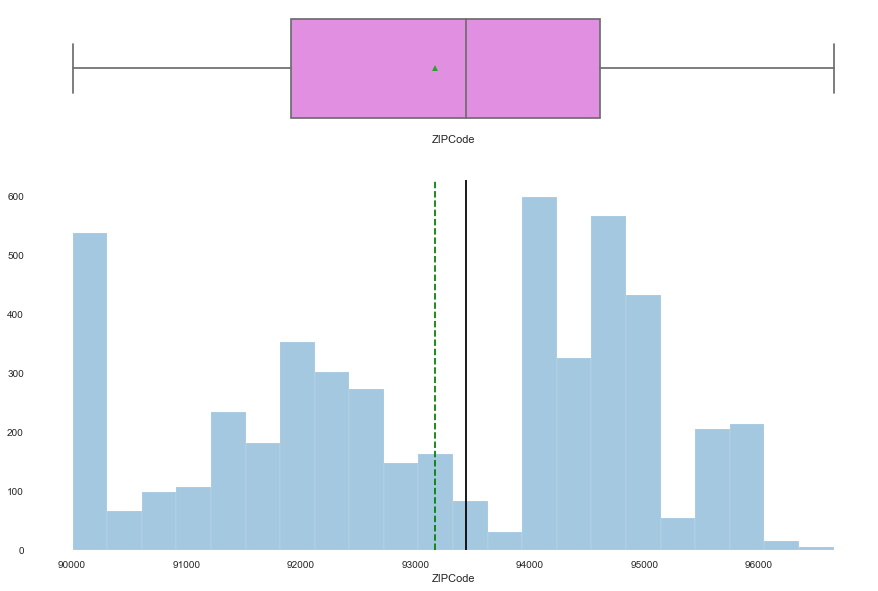

In [22]:
histogram_boxplot(ldata['ZIPCode'])

- The data seem to be left-skewed. 
- The zip codes don't really give you a clear picture about location distribution. We should find a way to convert an integer zip into City and state names

### Countplots of categorical dummy variables:

<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

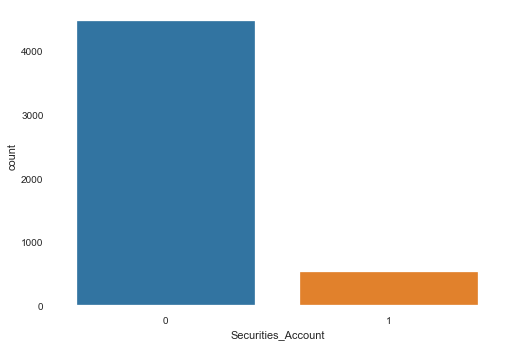

In [23]:
sns.countplot(ldata['Securities_Account'])

<AxesSubplot:xlabel='CD_Account', ylabel='count'>

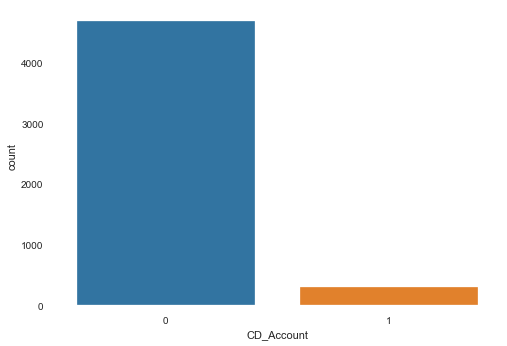

In [24]:
sns.countplot(ldata['CD_Account'])

<AxesSubplot:xlabel='Online', ylabel='count'>

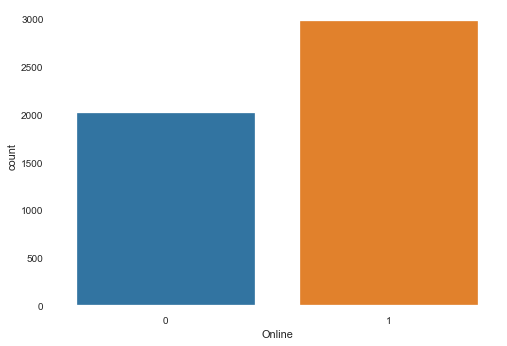

In [25]:
sns.countplot(ldata['Online'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

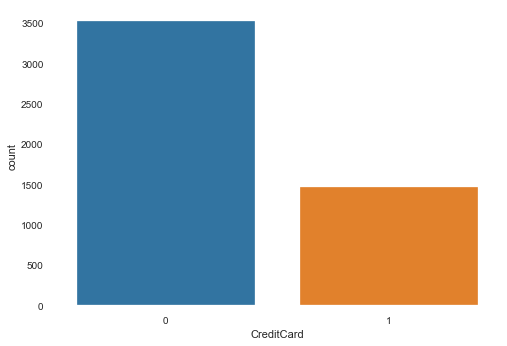

In [26]:
sns.countplot(ldata['CreditCard'])

<AxesSubplot:xlabel='Experience', ylabel='Density'>

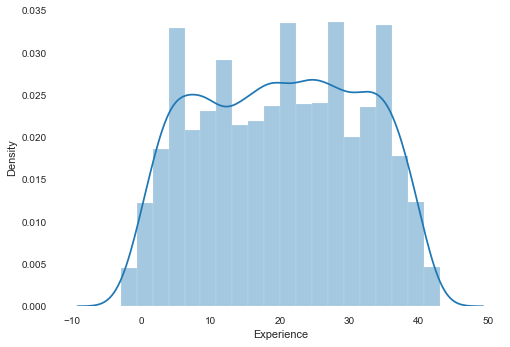

In [27]:
sns.distplot(ldata['Experience'])

 - We can clearly see that there are a number of negative values in the column

## Bivariate Analysis

### Identify Correlation in data 

In [28]:
ldata.corr() # It will show correlation matrix 

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


### Heatmap of correlations

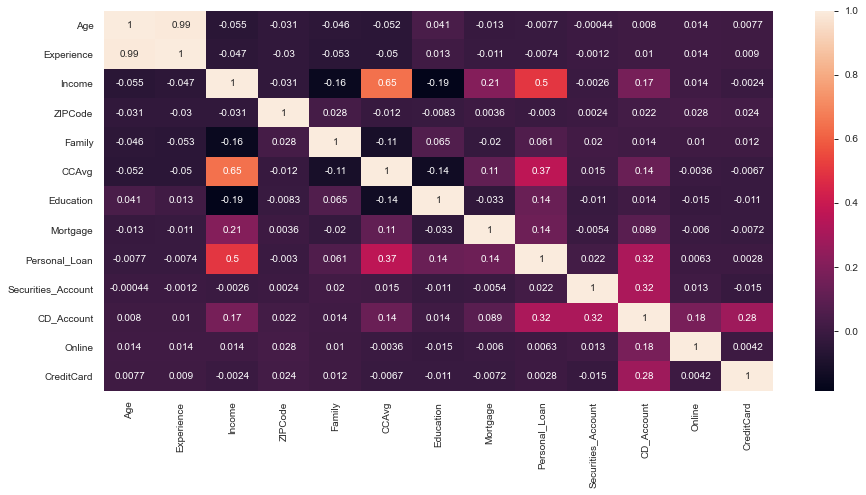

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(ldata.corr(),annot=True)
plt.show()

### Observations and Insights

- If We look at the Personal_Loan column, we can see that it has a somewhat strong correlation of 0.5 with the Income feature. 
- The CCAvg and CD_Account features also correlate with the Personal_Loan column.
- It's also interesting to note that the ZIPCode feature doesn't really have any correlation with the other features in the dataset, so it might be safe to just drop the feature.

### Pair plots of all columns

<Figure size 1440x720 with 0 Axes>

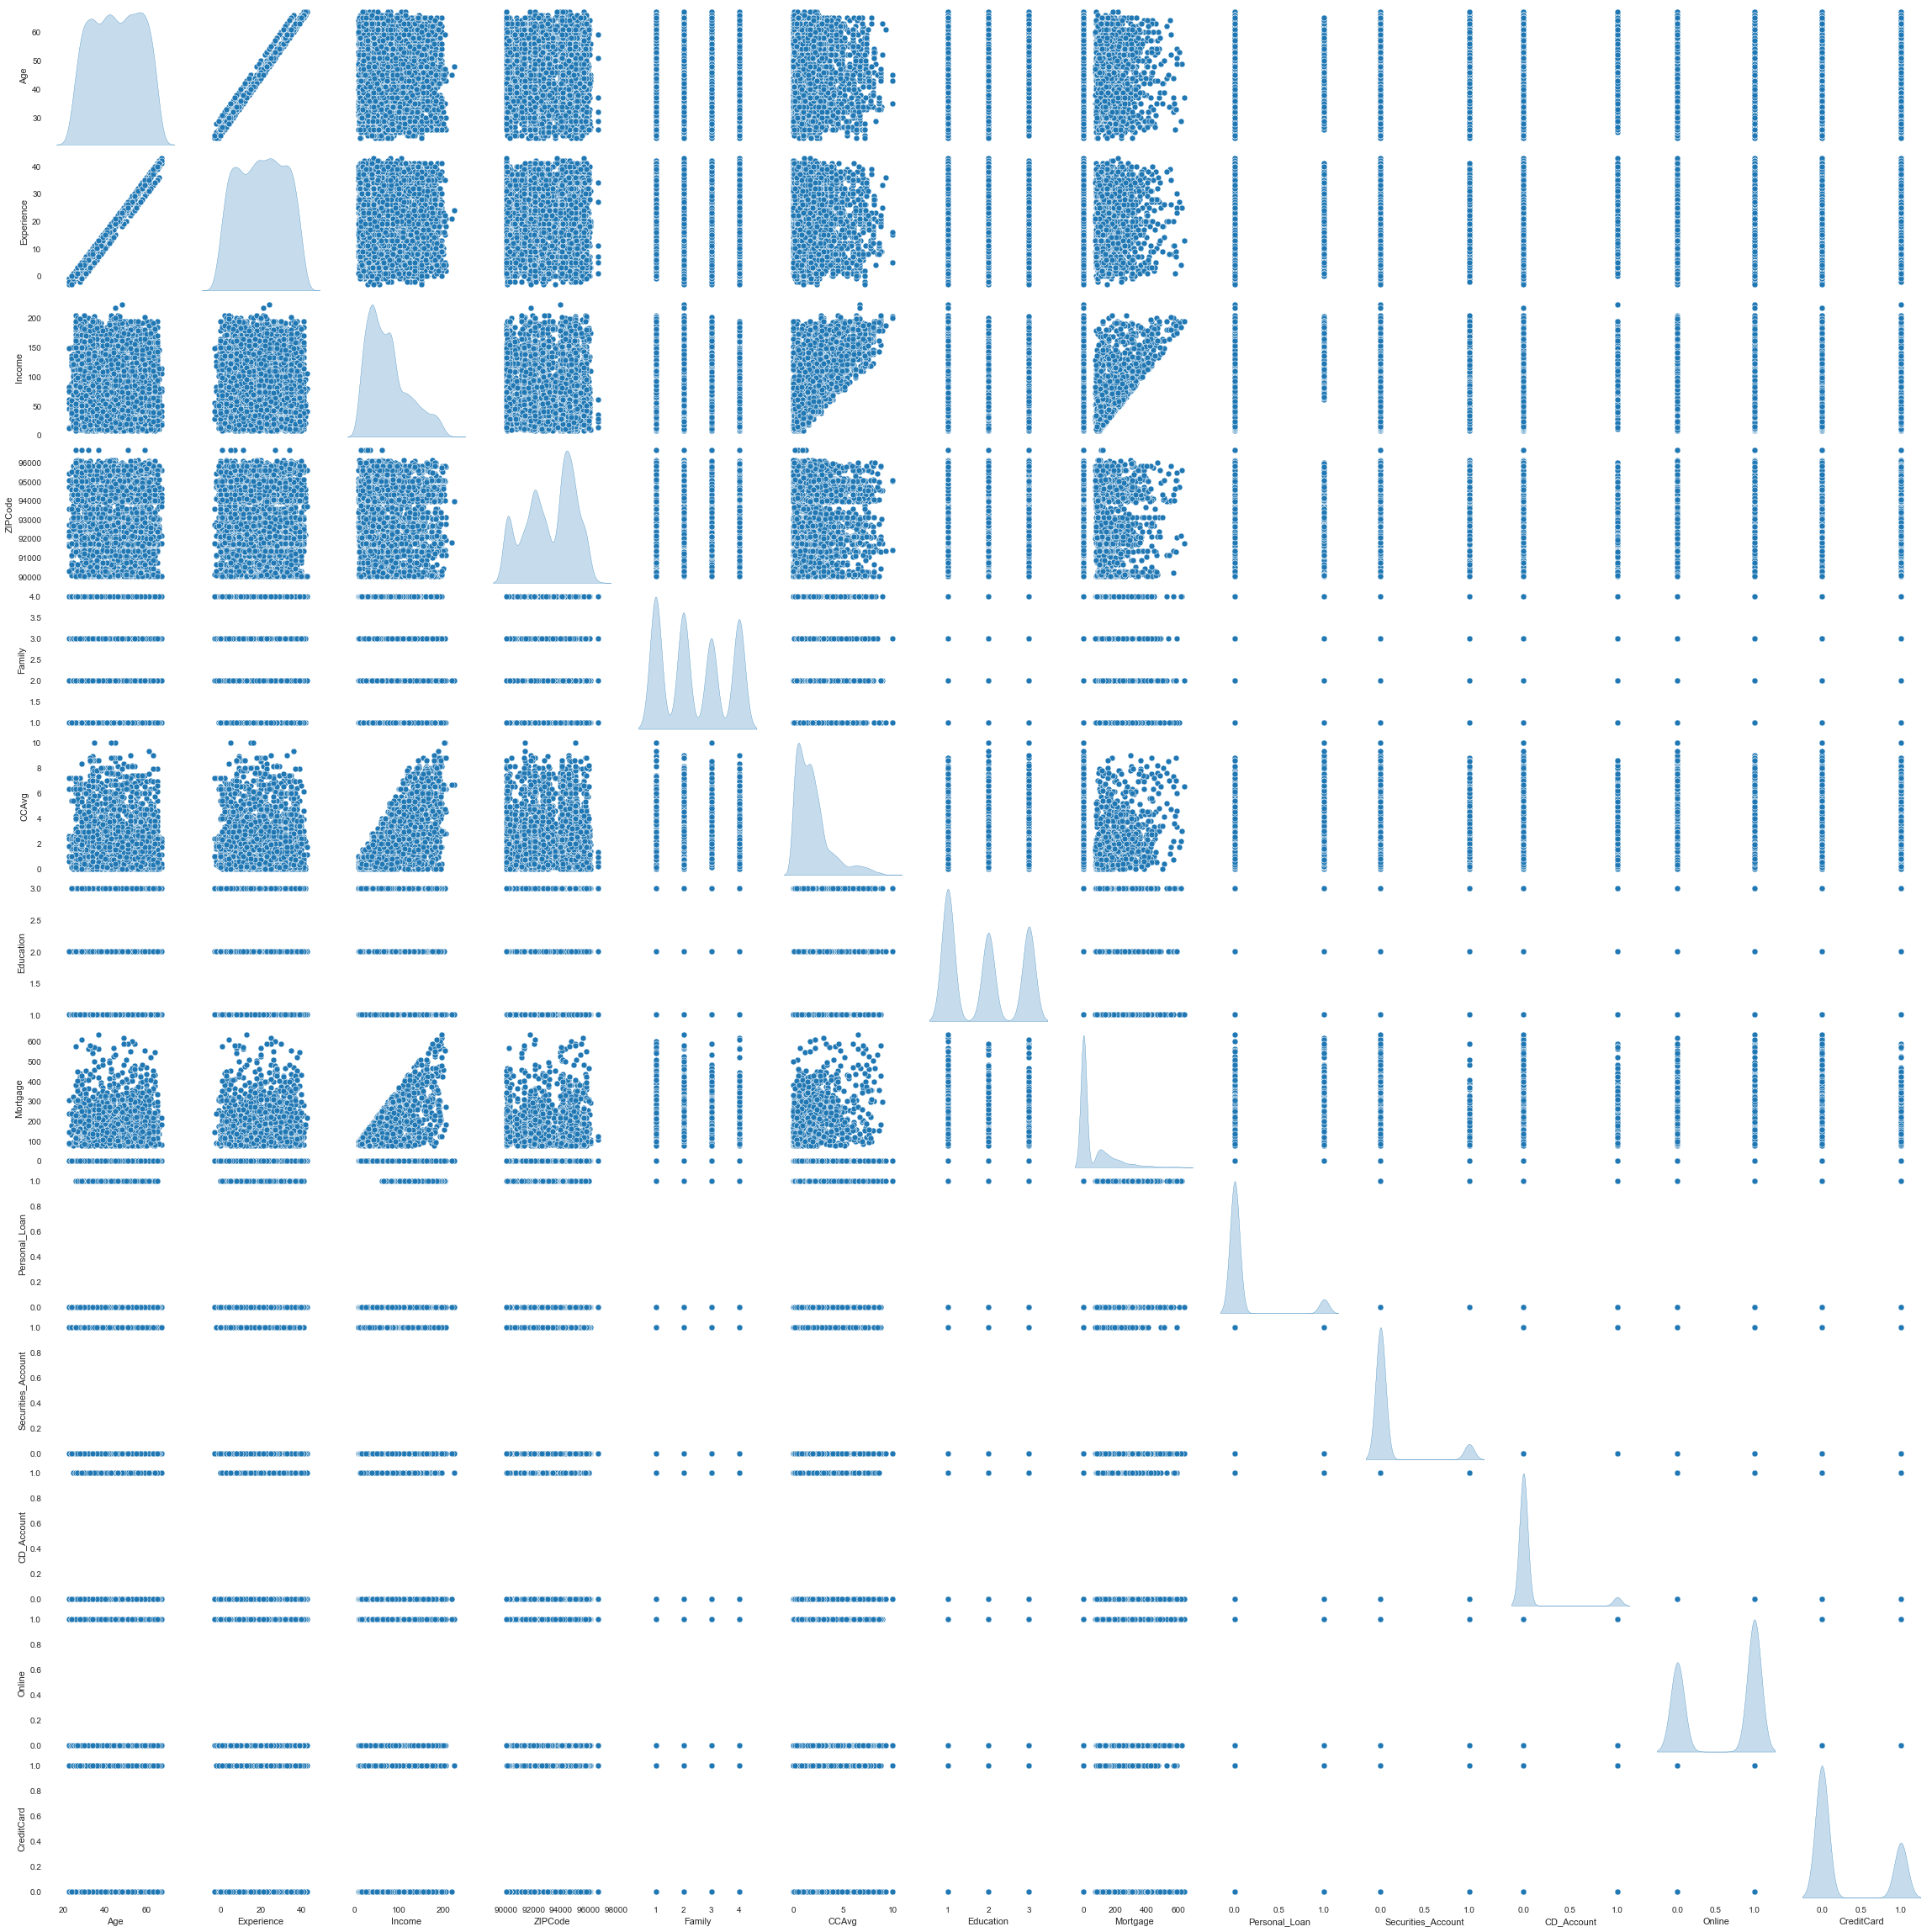

In [30]:
plt.figure(figsize=(20,10))
sns.pairplot(ldata, diag_kind='kde')

**Observation** There is strong collinearity visible between variables Age and Experience. Which makes sense, since people get more experienced with age. There is also some linear relationships between variables Income and CCAvg

### Scatterplots of Age vs Income and Income vs CCAvg 

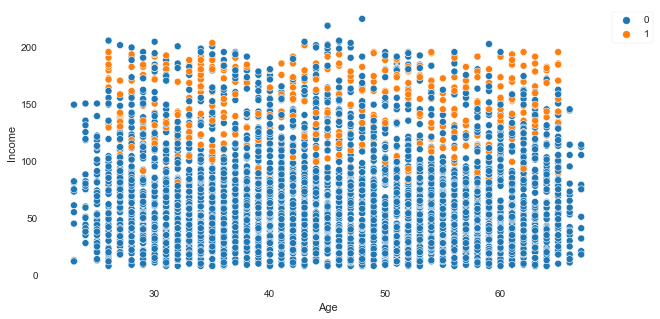

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(ldata['Age'], ldata['Income'],hue=ldata['Personal_Loan'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1));
plt.show()

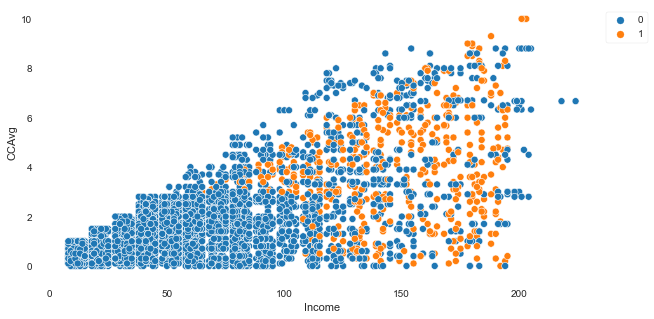

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(ldata['Income'], ldata['CCAvg'],hue=ldata['Personal_Loan'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1));
plt.show()

**Observations**: As Income grows, so does the number of people who take Personal Loans, there is an evident cutoff point close 100K after which there seems to be a lot of people who took personal loans.

### Generating stacked plots of most interesting features according to how many people took a Personal Loan

In [33]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, ldata["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, ldata["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

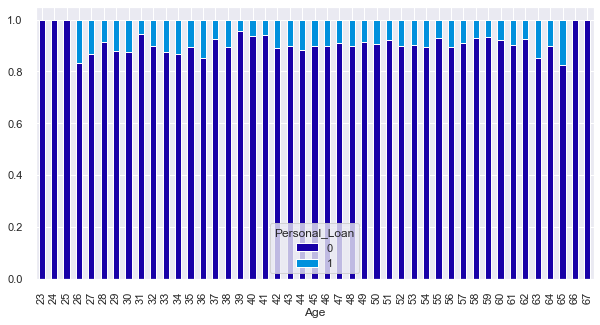

In [34]:
stacked_plot(ldata["Age"])

Personal_Loan     0    1   All
Experience                    
-3                4    0     4
-2               15    0    15
-1               33    0    33
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27      

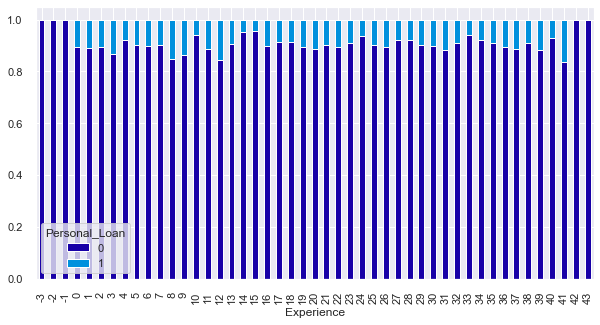

In [35]:
stacked_plot(ldata["Experience"])

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


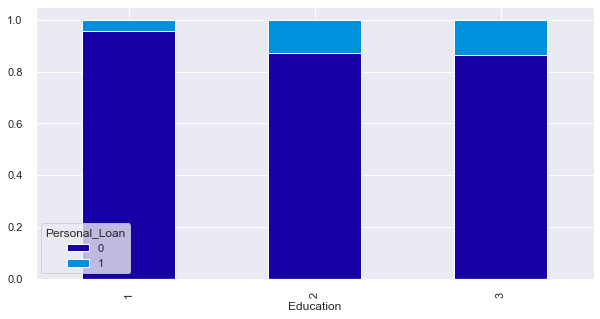

In [36]:
stacked_plot(ldata["Education"])

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


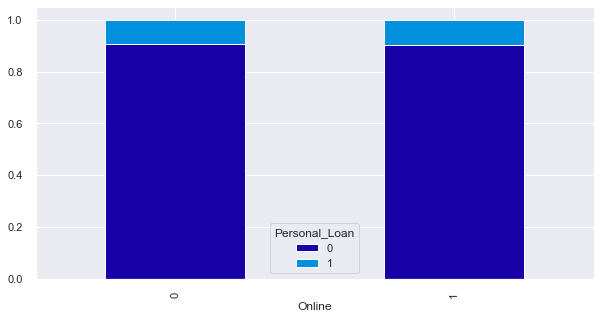

In [37]:
stacked_plot(ldata["Online"])

### Observations and Insights

- People with professional degrees seem to take more personal loans than people with grad and undergrad degrees
- People in the age range of 26-30 tend to take more personal loans, also people in their 60-s

Good time to copy the data for decision tree analysis

In [38]:
tree_data = ldata.copy()

Feature Engineering
------------------------------------

### Negative values in Experience

In [39]:
ldata[ldata['Experience'] < 0].count()

Age                   52
Experience            52
Income                52
ZIPCode               52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal_Loan         52
Securities_Account    52
CD_Account            52
Online                52
CreditCard            52
dtype: int64

In [40]:
ldata['Experience'] = ldata['Experience'].apply(lambda x: -x if x<0 else x)

In [41]:
ldata[ldata['Experience'] < 0].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:xlabel='Experience', ylabel='Density'>

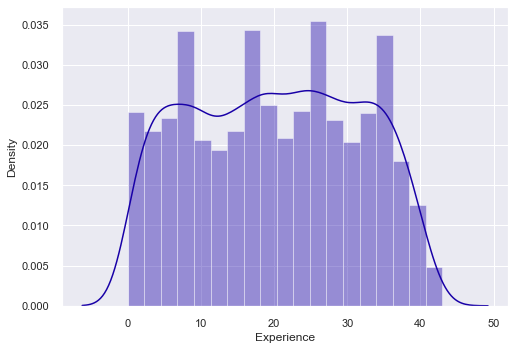

In [42]:
sns.distplot(ldata['Experience'])

I got rid of negative values by simply multiplying by negative 1

### Outlier treatment

From the section on univariate analysis, it was clear that we have one columns: MonthlyIncome that have significant amount of outliers. We shall deal with those outliers by substituting them by upper whisker value.

In [43]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data


In [44]:
ldata = treat_outliers(ldata,'Income')

In [45]:
ldata = treat_outliers(ldata,'Mortgage')

In [46]:
ldata = treat_outliers(ldata,'CCAvg')

Check to see if treatment worked on columns with outliers:

<AxesSubplot:xlabel='Income'>

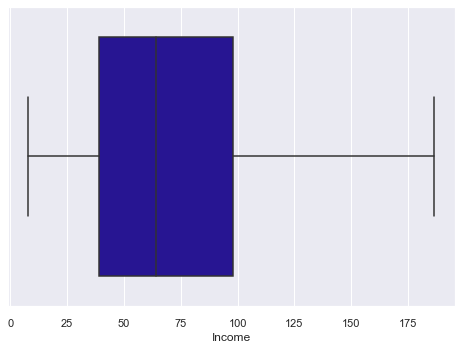

In [47]:
sns.boxplot(ldata['Income'])

<AxesSubplot:xlabel='Mortgage'>

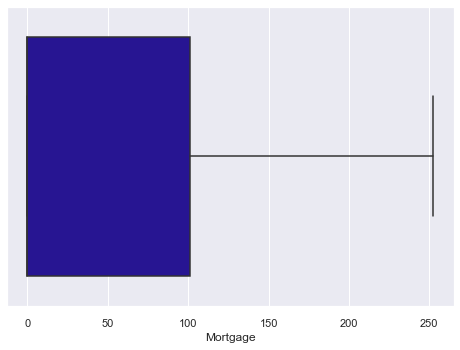

In [48]:
sns.boxplot(ldata['Mortgage'])

<AxesSubplot:xlabel='CCAvg'>

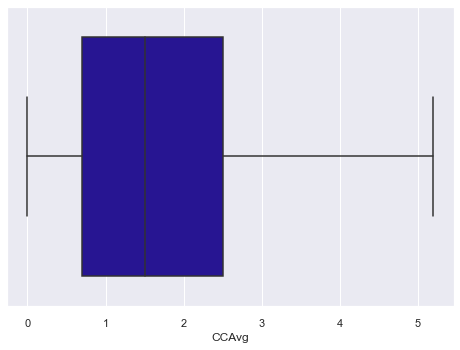

In [49]:
sns.boxplot(ldata['CCAvg'])

We have successfully treated the outliers in the three columns of interest

### Converting ZIP code into categorical column

#### Install pyzipcode to get city and state from a zip code

In [50]:
import sys
!{sys.executable} -m pip install pysqlite3
!{sys.executable} -m pip install pyzipcode

  Using cached pysqlite3-0.4.6.tar.gz (40 kB)
  Running setup.py clean for pysqlite3
Failed to build pysqlite3
    Running setup.py install for pysqlite3: started
    Running setup.py install for pysqlite3: finished with status 'done'


  Command arguments: 'C:\Users\Aidos\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Aidos\\AppData\\Local\\Temp\\pip-install-9e0bwdzu\\pysqlite3\\setup.py'"'"'; __file__='"'"'C:\\Users\\Aidos\\AppData\\Local\\Temp\\pip-install-9e0bwdzu\\pysqlite3\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Aidos\AppData\Local\Temp\pip-wheel-egpct1it'
  Command output: [use --verbose to show]


In [51]:
ldata['ZIPCode'].head()

0    91107
1    90089
2    94720
3    94112
4    91330
Name: ZIPCode, dtype: int64

In [52]:
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()
ldata['City'] = ldata['ZIPCode'].apply(lambda x: 'Unknown' if x == 92717 or x == 92717 or x == 93077 or x == 92634 
                                       or x == 96651 
                                       else zcdb[x].city + ', ' + zcdb[x].state)

**Observations**: some of the zip codes could not be identified by pyzipcode, so I replaced them with the 'Unknown' string which later be treated as a separate category

In [53]:
ldata['City'].head()

0         Pasadena, CA
1      Los Angeles, CA
2         Berkeley, CA
3    San Francisco, CA
4       Northridge, CA
Name: City, dtype: object

In [54]:
ldata['City'].value_counts()

Los Angeles, CA      375
San Diego, CA        269
San Francisco, CA    257
Berkeley, CA         241
Sacramento, CA       148
                    ... 
Tahoe City, CA         1
Sierra Madre, CA       1
Stinson Beach, CA      1
Sausalito, CA          1
Ladera Ranch, CA       1
Name: City, Length: 243, dtype: int64

In [55]:
ldata['City'].nunique()

243

In [56]:
ldata[ldata['City'] == 'Unknown'].count()

Age                   34
Experience            34
Income                34
ZIPCode               34
Family                34
CCAvg                 34
Education             34
Mortgage              34
Personal_Loan         34
Securities_Account    34
CD_Account            34
Online                34
CreditCard            34
City                  34
dtype: int64

In [57]:
ldata['City'] = ldata['City'].astype('category')

In [58]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   float64 
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  City                5000 non-null   category
dtypes: category(1), float64(3), int64(10)
memory usage: 529.6 KB


Now we can safely drop the ZIPCode column

In [59]:
ldata.drop('ZIPCode', inplace = True, axis = 1)

In [60]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Mortgage            5000 non-null   float64 
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  City                5000 non-null   category
dtypes: category(1), float64(3), int64(9)
memory usage: 490.5 KB


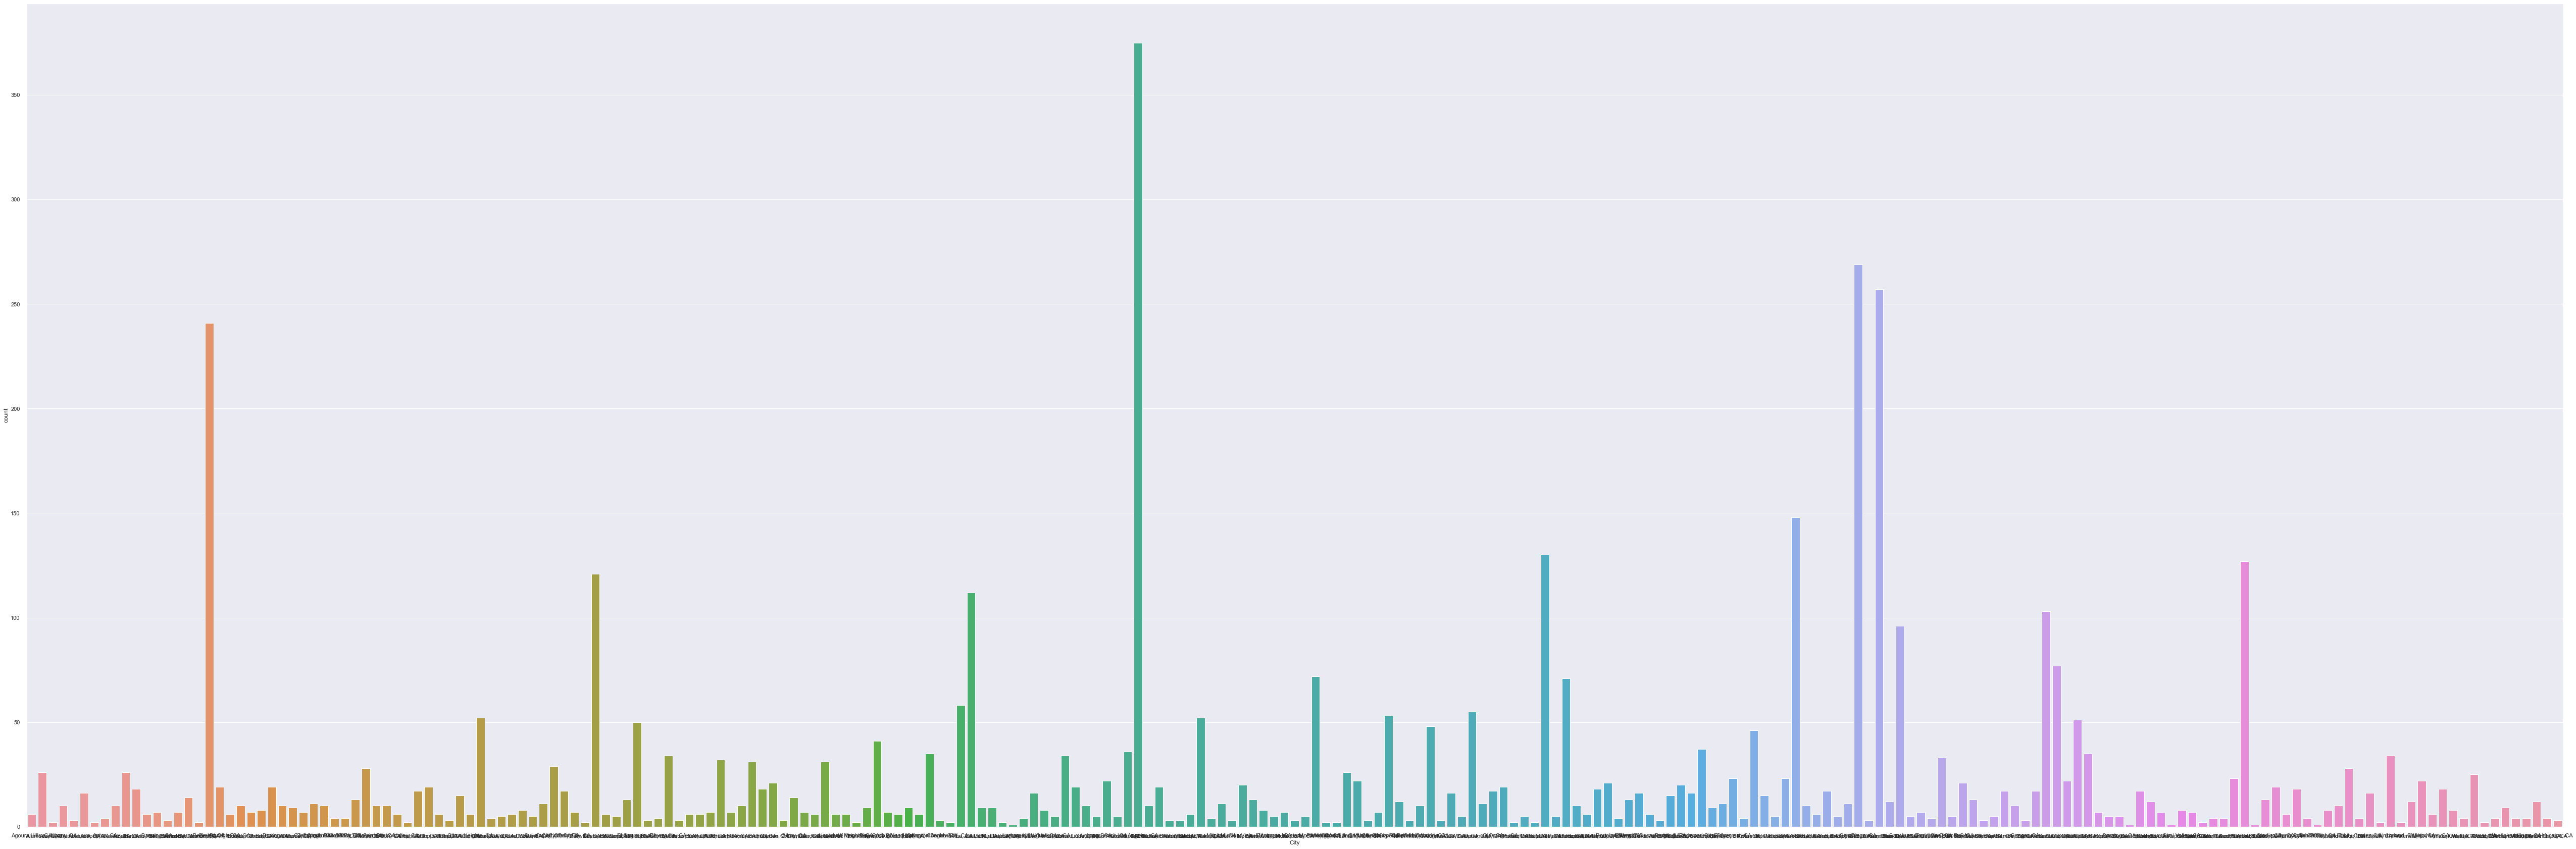

In [61]:
plt.figure(figsize=(90,30))
sns.countplot(ldata['City'])
plt.show()

**Observations:** 
- There are 243 unique locations (city + state), it gets hard to visualize the data distribution 
- pyzipcode could not find city and state for 34 zip codes

## Logistic Regression Model

Now that the dataset has been pre-processed we can begin building the model. I'll start by defining two useful functions: one to obtain the metrics for the model and another one to build the confusion matrix. Both these functions have been provided in the lectures and mentored sessions.

In [62]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
from sklearn.metrics import f1_score
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [63]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual Yes","Actual NO"]],
                  columns = [i for i in ['Predicted Yes','Predicted No']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Split Data

I will split the data 70% to 30% test/train ratio. We also have to make sure we get the same number of true/false values for the dependent variable in both training and test sets.

In [64]:
Xlog = ldata.drop(['Personal_Loan', 'City'],axis=1)                                                 # Features
ylog = ldata['Personal_Loan']                                            # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(ldata.loc[ldata['Personal_Loan'] == 1]), (len(ldata.loc[ldata['Personal_Loan'] == 1])/len(ldata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(ldata.loc[ldata['Personal_Loan'] == 0]), (len(ldata.loc[ldata['Personal_Loan'] == 0])/len(ldata.index)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)



In [65]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(Xlog,ylog, test_size=0.30, random_state = 1, stratify=ylog)
print("{0:0.2f}% data is in training set".format((len(X_train_log)/len(ldata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test_log)/len(ldata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [66]:
print(X_train_log.shape, X_test_log.shape)

(3500, 11) (1500, 11)


In [67]:

print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train_log[y_train_log[:] == 1]), (len(y_train_log[y_train_log[:] == 1])/len(y_train_log)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train_log[y_train_log[:] == 0]), (len(y_train_log[y_train_log[:] == 0])/len(y_train_log)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test_log[y_test_log[:] == 1]), (len(y_test_log[y_test_log[:] == 1])/len(y_test_log)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test_log[y_test_log[:] == 0]), (len(y_test_log[y_test_log[:] == 0])/len(y_test_log)) * 100))
print("")

Training Personal Loan True Values    : 336 (9.60%)
Training Personal Loan False Values   : 3164 (90.40%)

Test Personal Loan True Values        : 144 (9.60%)
Test Personal Loan False Values       : 1356 (90.40%)



The dataset was split correctly

### Check if our variables have multicollinearity:

**Variance Inflation factor**: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is “inflated”by the existence of correlation among the predictor variables in the model.

**General Rule of thumb**: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [68]:
# dataframe with numerical column only
num_feature_set = Xlog.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [69]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 431.616317
Age                    89.485706
Experience             89.385349
Income                  1.800952
Family                  1.033362
CCAvg                   1.698230
Education               1.107223
Mortgage                1.022989
Securities_Account      1.136877
CD_Account              1.328668
Online                  1.039535
CreditCard              1.107619
dtype: float64



- Age and Experience columns have very high multicollinearity, which makes sense, since Experience increases with age

## Removing Multicollinearity
To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

The method below to remove multicollinearity was provided to us at one of MLS sessions:

In [70]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LogisticRegression(random_state=1)
        model.fit(train, y_train)
        # Adj R-Sq
        
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        
    scores_LR = get_metrics_score(model,train,test,y_train_log,y_test_log,flag=True)

In [71]:
high_vif_columns = ["Age", "Experience"]

X_train1 = X_train_log.copy()
X_train1['constant'] = 1

X_test1 = X_test_log.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train_log, y_test_log)

Accuracy on training set :  0.9568571428571429
Accuracy on test set :  0.9553333333333334
Recall on training set :  0.6666666666666666
Recall on test set :  0.6527777777777778
Precision on training set :  0.8517110266159695
Precision on test set :  0.8468468468468469
F1 on training set :  0.7479131886477461
F1 on test set :  0.7372549019607842


**Observation**: Dropping the columns with high vif score definitely improves the model performance, so I am going to drop the Age and Experience columns:

In [72]:
X_train_log.drop(['Age', 'Experience'], axis = 1, inplace = True)
X_test_log.drop(['Age', 'Experience'], axis = 1, inplace = True)

Finally we are ready to fit the model and get the confusion matrix

### Fitting the Logistic Regression model

Accuracy on training set :  0.9525714285714286
Accuracy on test set :  0.952
Recall on training set :  0.6577380952380952
Recall on test set :  0.6388888888888888
Precision on training set :  0.8125
Precision on test set :  0.8214285714285714
F1 on training set :  0.7269736842105262
F1 on test set :  0.7187499999999999


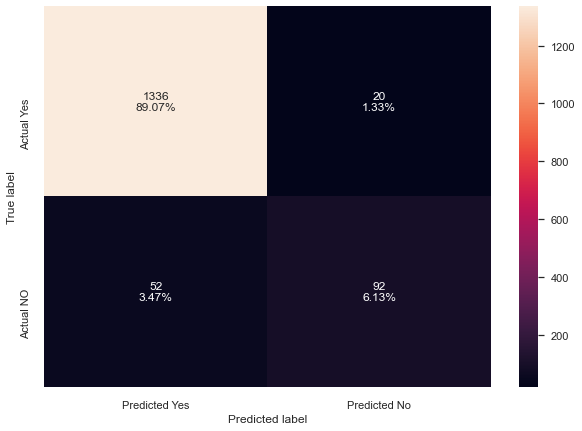

In [73]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train_log,y_train_log)
scores_LR = get_metrics_score(lg,X_train_log,X_test_log,y_train_log,y_test_log,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test_log,y_test_log)

* ROC-AUC on training set

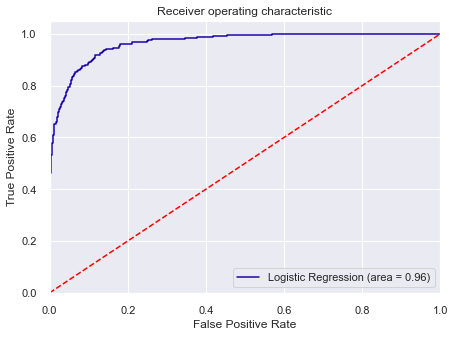

In [74]:
logit_roc_auc_train = roc_auc_score(y_train_log, lg.predict_proba(X_train_log)[:,1])
fpr, tpr, thresholds = roc_curve(y_train_log, lg.predict_proba(X_train_log)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Finding the coefficients

In [75]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train_log.columns, columns=['coef']).T

,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,0.052826,0.604416,0.149025,1.503595,0.000486,-0.997013,5.18813,-1.100074,-1.639715


### Observations on coefficients

- Coefficients of Income, Family, CCAvg, Education and CD_Account are positive, increase in these coefficients will lead to increase in the chances that the customer will take a personal loan.
- Coefficient of Mortgage is also positive, but is so insignificantly small, that I would go as far as to say it is safe to drop the column
- Coefficients on Securities_Account, Online and CreditCard are negative, so the increase in these coefficients will lead to decrease in the chances that the customer will take a personal loan.

###  Converting coefficients to odds

In [76]:
change_odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(change_odds, X_train_log.columns, columns=['odds']).T

,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
odds,5.424589,83.018219,16.070169,349.782854,0.048619,171.017468,17813.33049,200.438739,415.36998


### Observations and Insights

- The odds on the CD_Account feature are through the roof! The odds increase dramatically for the people who have CD_Accounts
- The chances of a person taking a personal loan increase dramatically (415%) if a person possesses Credit Card
- The chances of a person taking a personal loan decrease dramatically if a person uses bank's online services and has a Securities_Account (200% and 171% respectively)
- 1 unit change in the Education will change the odds of a person taking a personal loan by 349%.
- 1 unit change in the number of family members will change the odds of a person taking a personal loan by 83%

The model is generalizing quite well to the test set. I'm generally satisfied with the evaluation metrics for the model, but let us try to improve the metrics slightly:

## Model Performance Improvement

### Optimal threshold using AUC-ROC curve

In [77]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test_log, lg.predict_proba(X_test_log)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.06393376451064597


In [78]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train_log)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test_log)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train_log, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test_log, pred_test_opt))

print('Recall on train data:',recall_score(y_train_log, pred_train_opt) )
print('Recall on test data:',recall_score(y_test_log, pred_test_opt))

print('Precision on train data:',precision_score(y_train_log, pred_train_opt) )
print('Precision on test data:',precision_score(y_test_log, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train_log, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test_log, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train_log, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test_log, pred_test_opt))

Accuracy on train data: 0.8557142857142858
Accuracy on test data: 0.8646666666666667
Recall on train data: 0.9434523809523809
Recall on test data: 0.8958333333333334
Precision on train data: 0.39476961394769616
Precision on test data: 0.4069400630914827
F1 Score on train data: 0.5566286215978928
F1 Score on test data: 0.5596529284164858
ROC-AUC Score on train data: 0.8949246734091868
ROC-AUC Score on test data: 0.8785951327433629


- Recall has increased significantly with the optimal threshold, but there is a considerable decrease in precision. Let's choose a different threshold:

#### Use Precision-Recall curve and see if we can find a better threshold

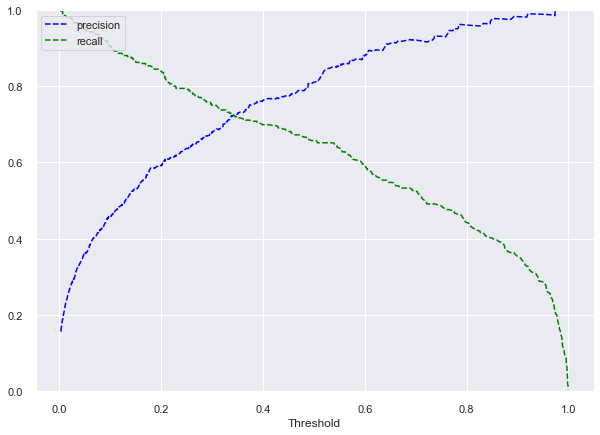

In [79]:
y_scores=lg.predict_proba(X_train_log)[:,1]
prec, rec, tre = precision_recall_curve(y_train_log, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [80]:
optimal_threshold = 0.34

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train_log)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test_log)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train_log, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test_log, pred_test_opt))

print('Recall on train data:',recall_score(y_train_log, pred_train_opt))
print('Recall on test data:',recall_score(y_test_log, pred_test_opt))

print('Precision on train data:',precision_score(y_train_log, pred_train_opt) )
print('Precision on test data:',precision_score(y_test_log, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train_log, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test_log, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train_log, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test_log, pred_test_opt))

Accuracy on train data: 0.9468571428571428
Accuracy on test data: 0.9446666666666667
Recall on train data: 0.7232142857142857
Recall on test data: 0.7152777777777778
Precision on train data: 0.7232142857142857
Precision on test data: 0.7103448275862069
F1 Score on train data: 0.7232142857142857
F1 Score on test data: 0.7128027681660899
ROC-AUC Score on train data: 0.8469105562579015
ROC-AUC Score on test data: 0.8421521632251721


This is much better, we have approximately same values for recall and precision arount 71%

# Selecting subset of important features using Sequential Feature Selector method

### Benefits of feature selection:
- Reduces dimensionality
- Discards uninformative features
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalisation)
- Speeds training/testing

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [82]:
## Defining X and Y variables
X = ldata.drop(['Personal_Loan', 'City'], axis=1)
Y = ldata['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [83]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [84]:
X_train.shape

(3500, 11)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    3.0s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.2s finished

[2021-04-29 08:45:21] Features: 1/11 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2021-04-29 08:45:21] Features: 2/11 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s finished

[2021-04-29 08:45:22

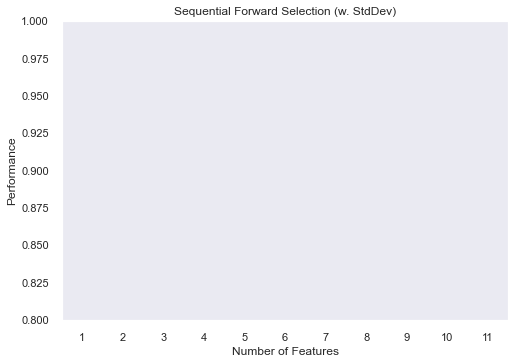

In [85]:
# we will first build model with all varaibles
sfs = SFS(m, k_features=11, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**Observation** I don't know why it is not plotting anything, it's clearly working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-04-29 08:45:25] Features: 1/3 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2021-04-29 08:45:25] Features: 2/3 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.4s finished

[2021-04-29 08:45:25] 

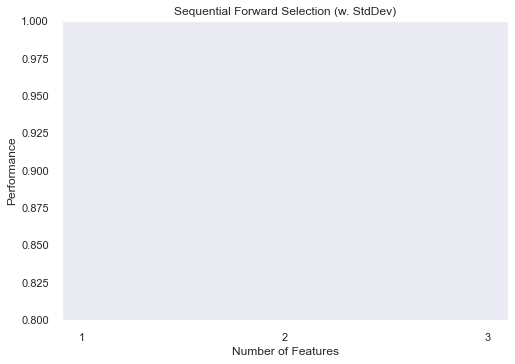

In [86]:
sfs1 = SFS(m, k_features=3, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [87]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 5, 8]


In [88]:
X_train.columns[feat_cols]

Index(['Income', 'Education', 'CD_Account'], dtype='object')

- We've identified the 3 most important features, so let's move on with only them:

In [89]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [90]:
X_train_final.shape

(3500, 3)

In [91]:
X_test_final.shape

(1500, 3)

In [92]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Look at model performance

Accuracy on training set :  0.956
Accuracy on test set :  0.956
Recall on training set :  0.5891238670694864
Recall on test set :  0.5906040268456376
Precision on training set :  0.9154929577464789
Precision on test set :  0.946236559139785
F1 on training set :  0.7169117647058824
F1 on test set :  0.7272727272727273


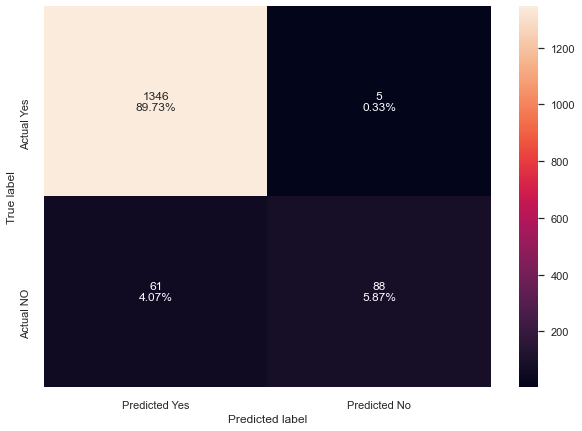

In [93]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

In [94]:
comparison_frame = pd.DataFrame({'Model':['Initial Logistic Regression Model with sklearn', 
                                          'Logistic Regression - Optimal threshold = 0 .34',
                                          'Logistic Regression - with sequential feature selector - 9 variables'], 
                                 'Train_Accuracy':[0.95,0.946,0.956], 
                                 'Test_Accuracy':[0.952,0.944, 0.956],
                                 'Train Recall':[0.658,0.723,0.589],
                                 'Test Recall':[0.638,0.715,0.59], 
                                 'Train Precision':[0.813,0.723,0.915],
                                 'Test Precision':[0.821,0.71,0.946],
                                 'Train F1':[0.727,0.723,0.7169],
                                 'Test F1':[0.719,0.713,0.727]
                                 
                                }) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Initial Logistic Regression Model with sklearn,0.950,0.952,0.658,0.638,0.813,0.821,0.7270,0.719
1,Logistic Regression - Optimal threshold = 0 .34,0.946,0.944,0.723,0.715,0.723,0.710,0.7230,0.713
2,Logistic Regression - with sequential feature ...,0.956,0.956,0.589,0.590,0.915,0.946,0.7169,0.727


## Conclusions and Recommendations for the Logistic Regression Classifier Model

- The initial model had pretty good evaluation metrics, the train and test metric values are close to each other. Setting the optimal threshold value to 0.34 improved train and test recall, but decreased the precision. After selecting a subset of important features using Sequential Feature Selector, the recall decreased to 0.59, but precision increased to over 0.91. 
- Personally, I think that using the optimal threshold gives a relatively balanced model in terms of all evaluation metrics, and if the goal of the bank is to increase recall, which is usually the case with handing out personal loans (asking the question of whether the client will default or not on the personal loan), I would recommend using the model with the optimal threshold of 0.34
- However, this is not the question of whether a client defaults or not, it's the question on which parameters to focus on when deciding if the client will buy a personal loan or not. So, the model gave us the coefficients on each feature. The main ones are Income, Education and CD Account. So I would focus on customers who have an income of >=150000 and do have a CD Account. I would also try to avoid customers who have Security Accounts and who use bank's online services if possible.

# Model Building for Decision Tree

1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [95]:
column_names = list(ldata.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City']


## Split Data

In [96]:
X = tree_data.drop('Personal_Loan',axis=1)                                                 # Features
y = tree_data['Personal_Loan'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [97]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 12) (1500, 12)


In [98]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(ldata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(ldata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [99]:
column_names = list(ldata.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City']


In [100]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [101]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

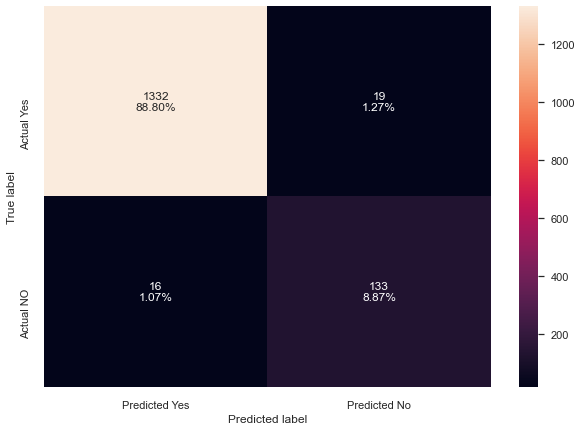

In [102]:
make_confusion_matrix(model,X_test,y_test)

In [103]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 91% accuracy, hence accuracy is not a good metric to evaluate here. We will focus on recall instead:

In [104]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [105]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


The model seems to be overfitting a bit. Let's visualize the tree:

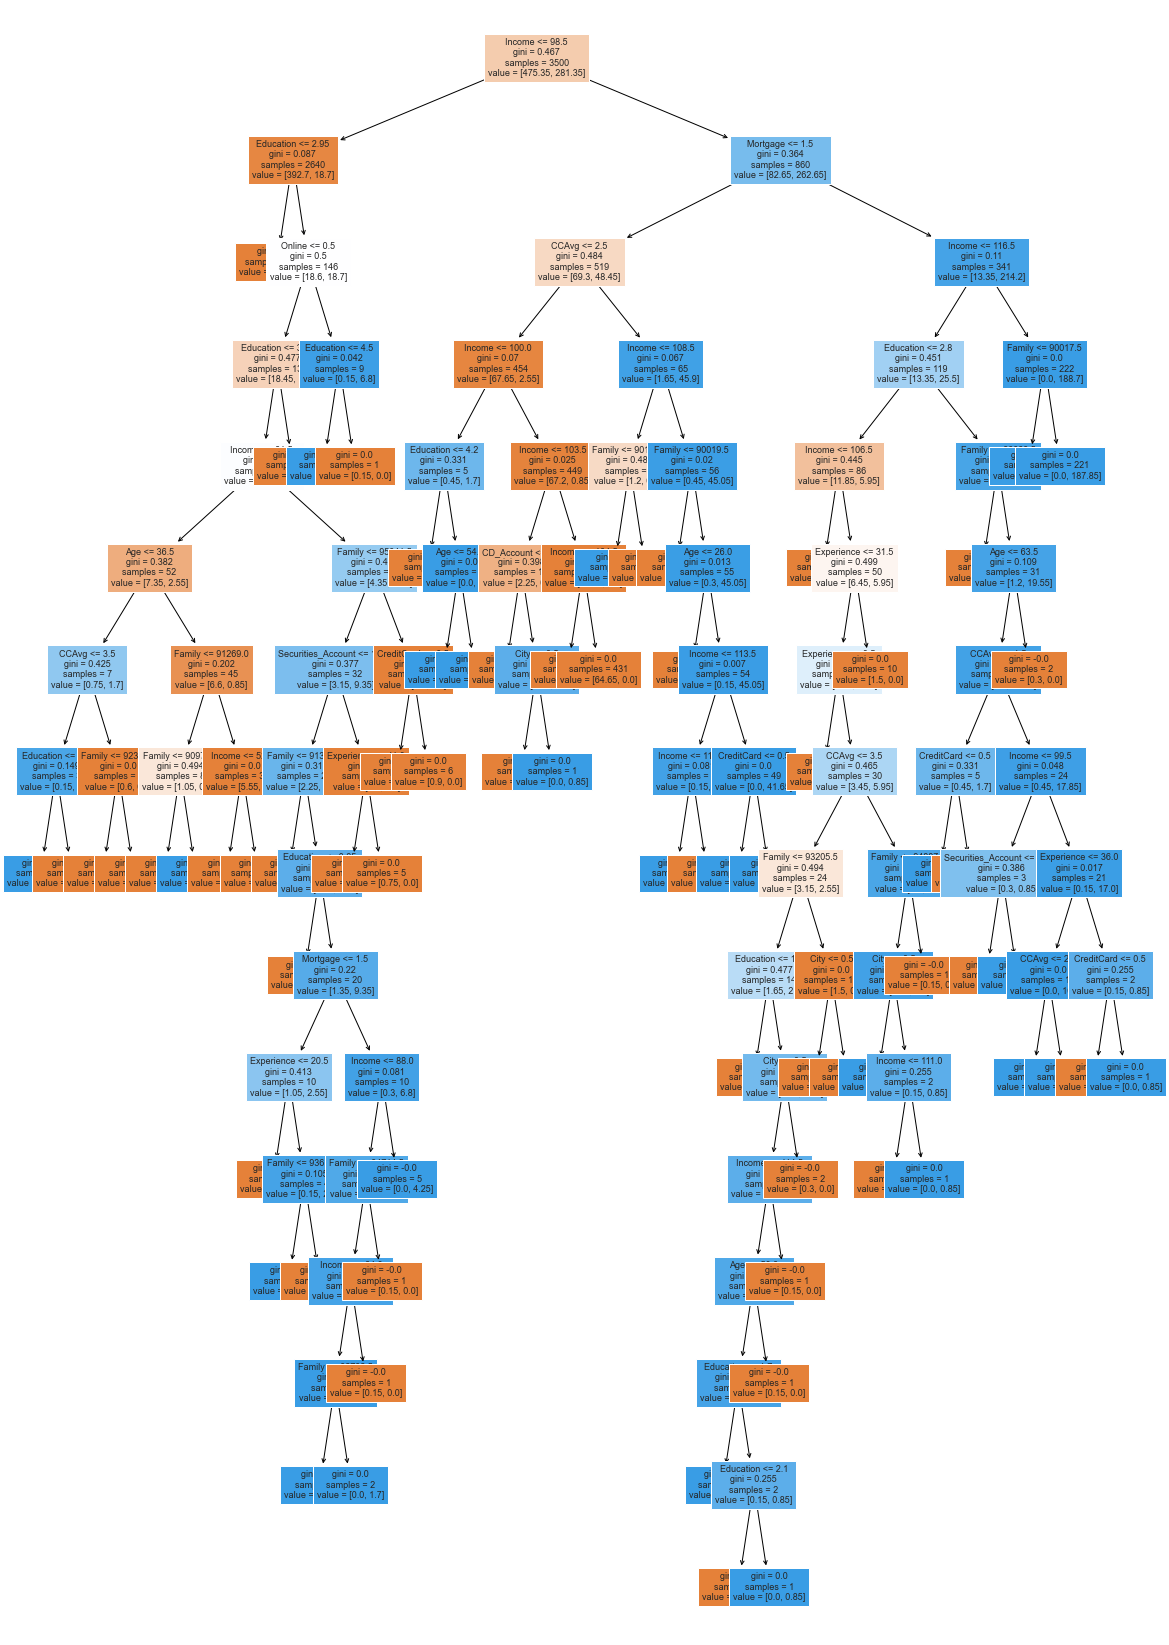

In [106]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [107]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- Education <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- Education >  2.95
|   |   |--- Online <= 0.50
|   |   |   |--- Education <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |--- Education <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- Education >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |--- Family <= 92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Family <= 91269.00
|   |   |   |   |   |   |   |--- Family <= 90974.00
|   |   |   |   |   |   |   |   |--- we

In [108]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.591182
Family              0.143778
Education           0.124105
CCAvg               0.083145
ZIPCode             0.019759
CD_Account          0.011000
Experience          0.008682
Age                 0.006593
Mortgage            0.004325
Securities_Account  0.002769
Online              0.002735
CreditCard          0.001928


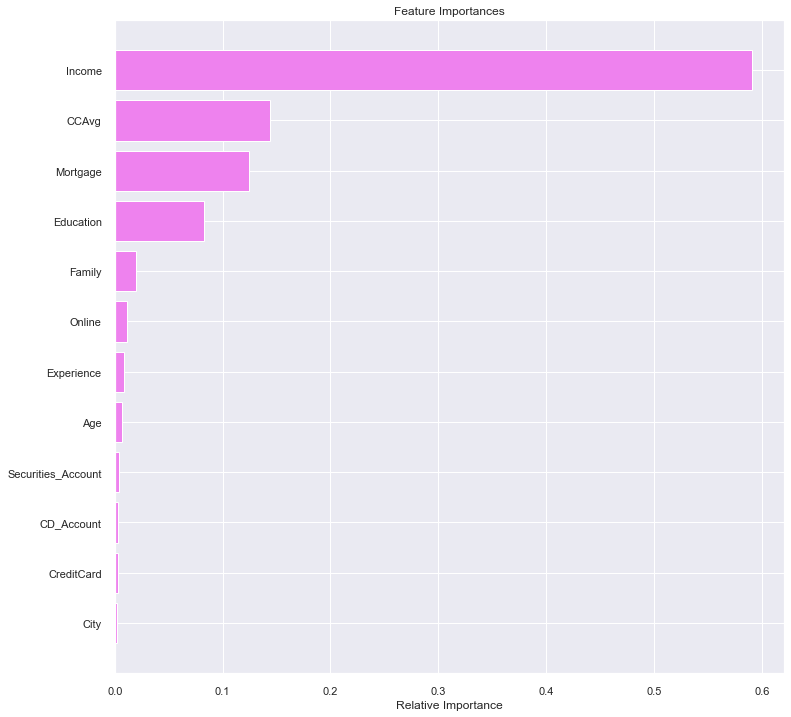

In [109]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the model, Income is the most important feature. Also, the tree is way too complicated. Let's try to simplify it:

## Reducing over fitting


### Using GridSearch for Hyperparameter tuning of our tree model

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=4, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

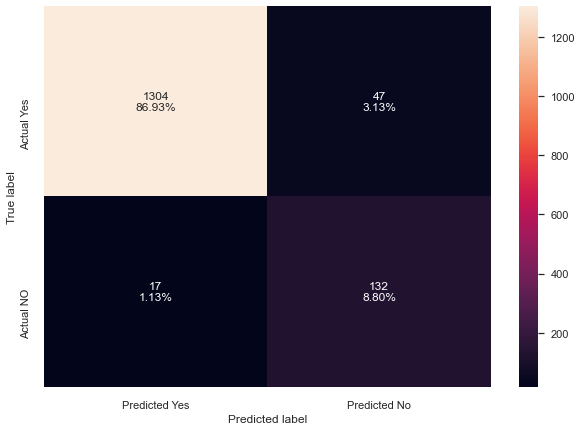

In [112]:
make_confusion_matrix(estimator,X_test,y_test)

In [113]:
get_recall_score(estimator)

Recall on training set :  0.9395770392749244
Recall on test set :  0.8859060402684564


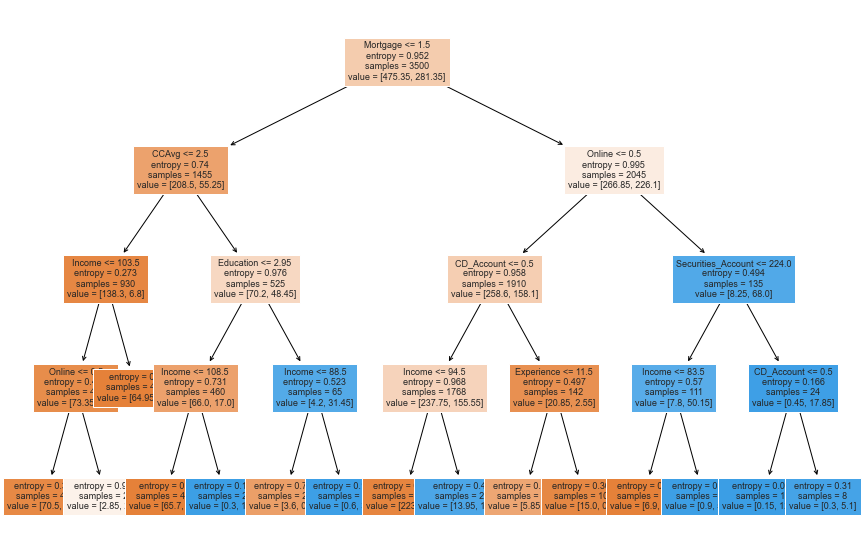

In [114]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [115]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Mortgage <= 1.50
|   |--- CCAvg <= 2.50
|   |   |--- Income <= 103.50
|   |   |   |--- Online <= 0.50
|   |   |   |   |--- weights: [70.50, 4.25] class: 0
|   |   |   |--- Online >  0.50
|   |   |   |   |--- weights: [2.85, 2.55] class: 0
|   |   |--- Income >  103.50
|   |   |   |--- weights: [64.95, 0.00] class: 0
|   |--- CCAvg >  2.50
|   |   |--- Education <= 2.95
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- weights: [65.70, 0.00] class: 0
|   |   |   |--- Income >  108.50
|   |   |   |   |--- weights: [0.30, 17.00] class: 1
|   |   |--- Education >  2.95
|   |   |   |--- Income <= 88.50
|   |   |   |   |--- weights: [3.60, 0.85] class: 0
|   |   |   |--- Income >  88.50
|   |   |   |   |--- weights: [0.60, 30.60] class: 1
|--- Mortgage >  1.50
|   |--- Online <= 0.50
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [223.80, 6.80] class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- weights: [13.95, 148.75] cla

In [116]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Income              0.674262
CD_Account          0.106434
Family              0.072754
CCAvg               0.066299
Education           0.063018
Securities_Account  0.012380
Mortgage            0.002966
Experience          0.001886
Age                 0.000000
ZIPCode             0.000000
Online              0.000000
CreditCard          0.000000


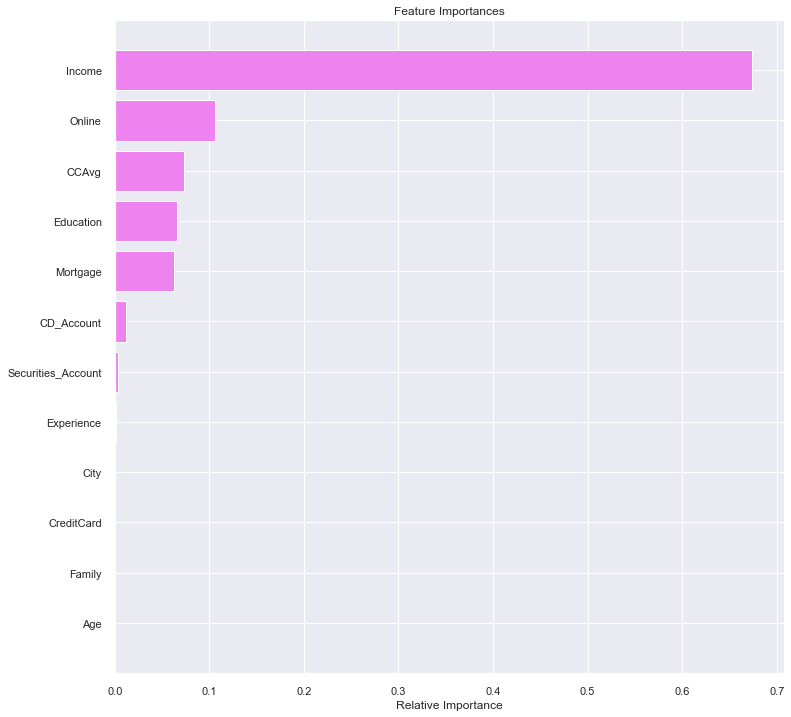

In [117]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The tree was simplified a lot, we also reduced the disparity between train and test sets on recall

## Cost Complexity Pruning


Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

## Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first

In [118]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [119]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.946208e-15
1,7.482671e-19,-7.945460e-15
2,7.482671e-19,-7.944712e-15
3,8.803143e-19,-7.943831e-15
4,4.071454e-18,-7.939760e-15
5,6.998499e-18,-7.932761e-15
6,7.042514e-18,-7.925719e-15
7,9.478050e-18,-7.916241e-15
8,1.166416e-17,-7.904577e-15
9,1.222170e-17,-7.892355e-15


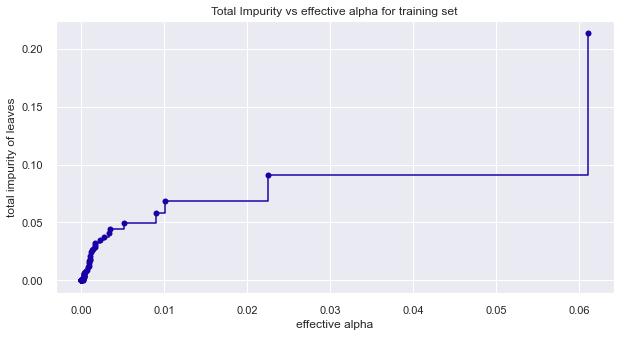

In [120]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [121]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948088


Кemove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases

## Accuracy vs alpha for training and testing sets

In [122]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

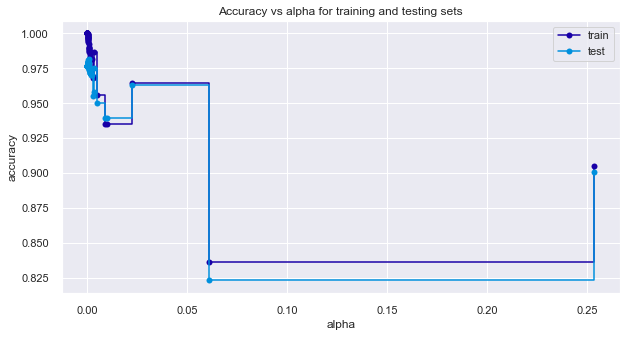

In [123]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

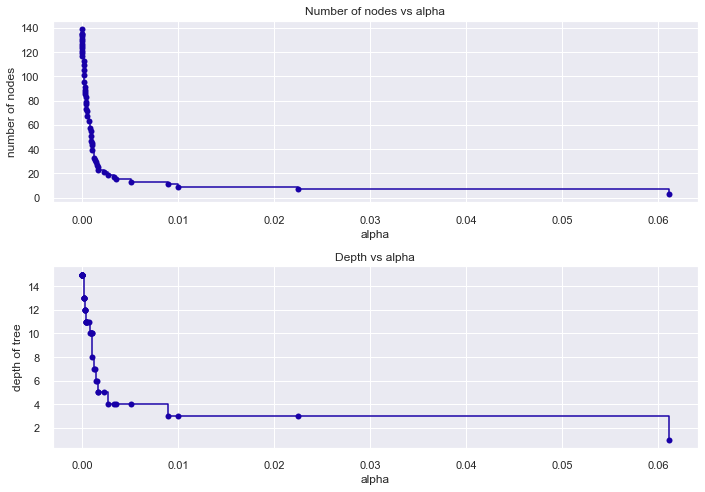

In [124]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [125]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [126]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [127]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

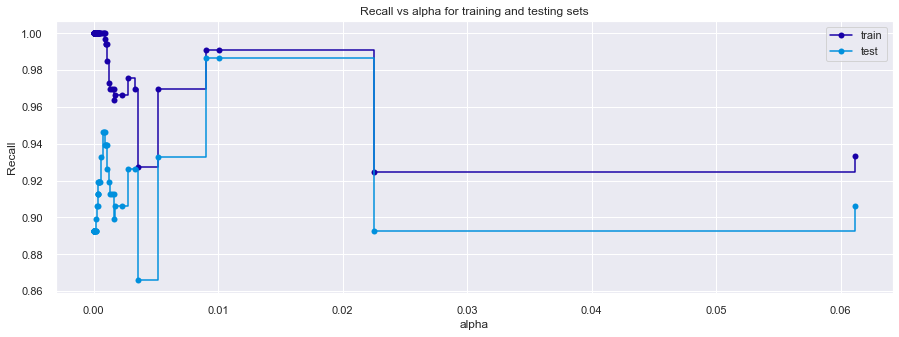

In [128]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of recall occurs at ~0.008. But let's try and choose the best fit**:

In [129]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00900843430150809,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [130]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00900843430150809,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

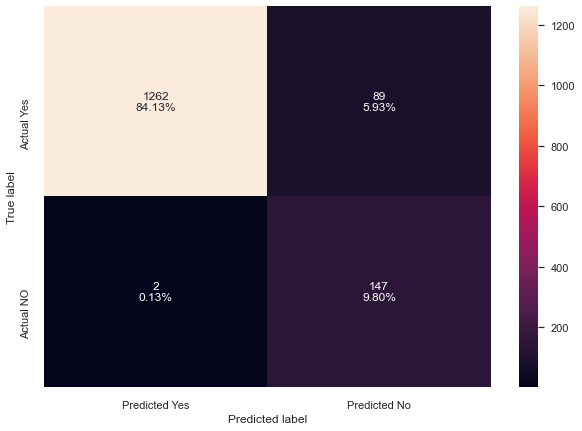

In [132]:
make_confusion_matrix(best_model,X_test,y_test)

In [133]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


## Visualizing the Decision Tree

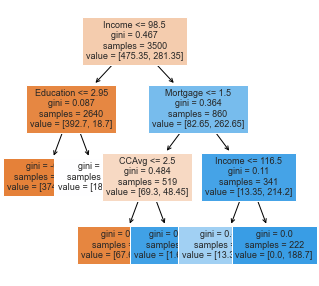

In [134]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [135]:
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- Education <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- Education >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Mortgage <= 1.50
|   |   |--- CCAvg <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- CCAvg >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Mortgage >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



### Observations and Insights
- The tree gives amazing recall scores on both the test and training sets
- For some reason, it chose to split on mortgage at the second level, where Income is greater than 98.5

Let's look at the importance of features:

In [136]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.645704
Family              0.158240
Education           0.140915
CCAvg               0.055142
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


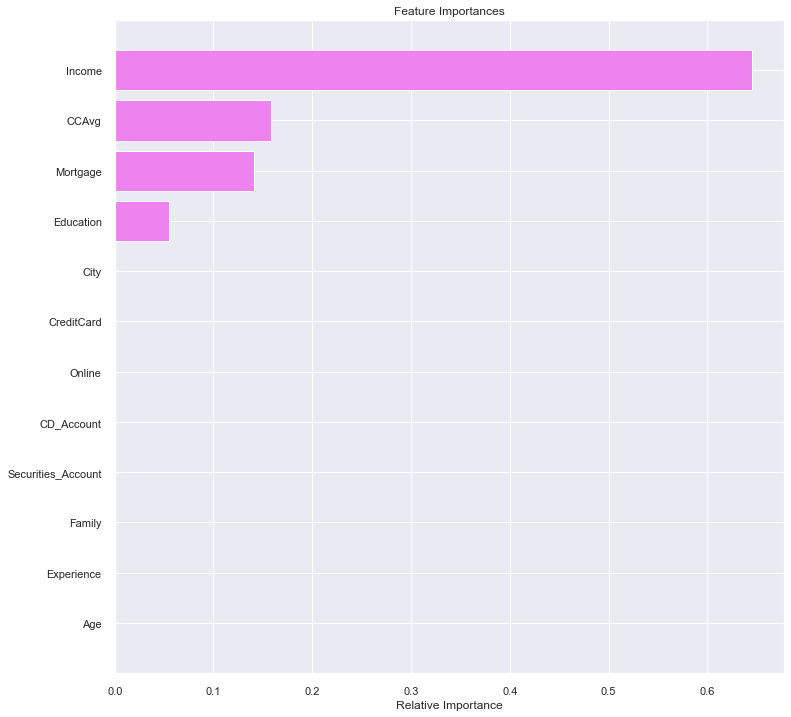

In [138]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusions and Recommendations

- Decision Trees require less data preparation (or even no preparation in this case). I didn't have to do outlier treatment or any other adjustments, which saved me a lot of time.
- The important features chosen in the tree differ slightly from the ones that were identified by the Logistic Regression model. For some reason, the tree ignores the CD_Account feature and instead splits on Mortgage. Other important columns seem to coincide with Logistic Regression model
- Performance of the decision tree model is way higher, especially on recall than that of the Logistic Regression classifier.

**Recommendations for the bank**
- Again, practically the same recommendations can be made for the decision tree model: target customers with higher income, Education level, and those who have CD_Accounts. Also consider the mortgage amount that these customers have.